# HAMOYE STAGE C DATASCIENCE TRACK
# MACHINE LEARNING - CLASSIFICATION


Hi, its Adedayo again,I am very excited to be back for stage C, I think the note structure once again a great outline line for studying because I had to go through some topics that I would have normally ignored or chosen a black box approach to them without  bothering to learn the inner workings, so an outline really removes all excuses.
This is a jupyter notebook containing a reformat the lessons and code from lesson 1 to 5 and in a manner I hope you think is clear and consise, it is mostly the same as the lesson notes with a few added personal insights, I encourage you correct me if i am wrong in some areas and give new insights so I can improve this notebook
so we can all have a an easier time studying, i do these notebooks for the feedback that helps me correct personal misunderstanding and to find out alternate and faster methods

#### How to use this notebook if  you download to your system
* if you just want to read it do not click on run
* for the section dealing with the data input the file location for the data on your device if you want to run
* make sure the kernel is active and you have ran the whole program once if you want to make random chnages at different points

* for suggestions and insights comment on github or send me a message on slack

# Lesson 1 - Linear	Classification	and	Logistic	Regression

In machine learning, classification is a supervised method of segmenting data points into various labels or classes. Unlike regression, the target variable in a
classification problem is discrete. Each data point used in training classification models must have a corresponding label in order for the characteristics and
patterns in the classes to be learnt appropriately. Classification can either be binary - identifying that a given email is spam or not or, multi-class - classifying
a fruit as orange, mango or banana.

## Linear	classifiers	and	the	importance	of	class	probabilities
For simplicity, we define a linear classifier as a binary classifier that separates two classes (positive and negative class) using a linear separator by
computing a linear combination of the features and comparing against a set threshold.

## Logistic	Regression:	Sigmoid,	logit	and	the	log-likelihood
Logistic regression is a linear algorithm that can be used for binary or multiclass classification. It is a discriminative classifier that estimates the probability
that an instance belongs to a class using an s-shape function curve called the sigmoid function. The predicted values obtained after using a linear equation
on the predictors by applying logistic regression can fall in the range of negative infinity to positive infinity. The sigmoid maps these results by shrinking the
value to fall between 0 and 1. We can say that we use the sigmoid function to transform linear regression into logistic regression.

\begin{array}{rrrl}
sigmoid \sigma(x) & = & \frac{\displaystyle 1 }{\displaystyle 1+ e^{-x}} \\
\end{array}

The sigmoid function can be applied to a linear equation,

\begin{array}{rrrl}
z= \beta_0 + \beta_1 x
\end{array}

to obtain values h between 0 and 1 such that

\begin{array}{rrrl}
h= \sigma(z) & = & \frac{\displaystyle 1 }{\displaystyle 1+ e^{-z}} =& \frac{\displaystyle 1 }{\displaystyle 1+ e^{-(\beta_0 + \beta_1 x)}} \\
\end{array}

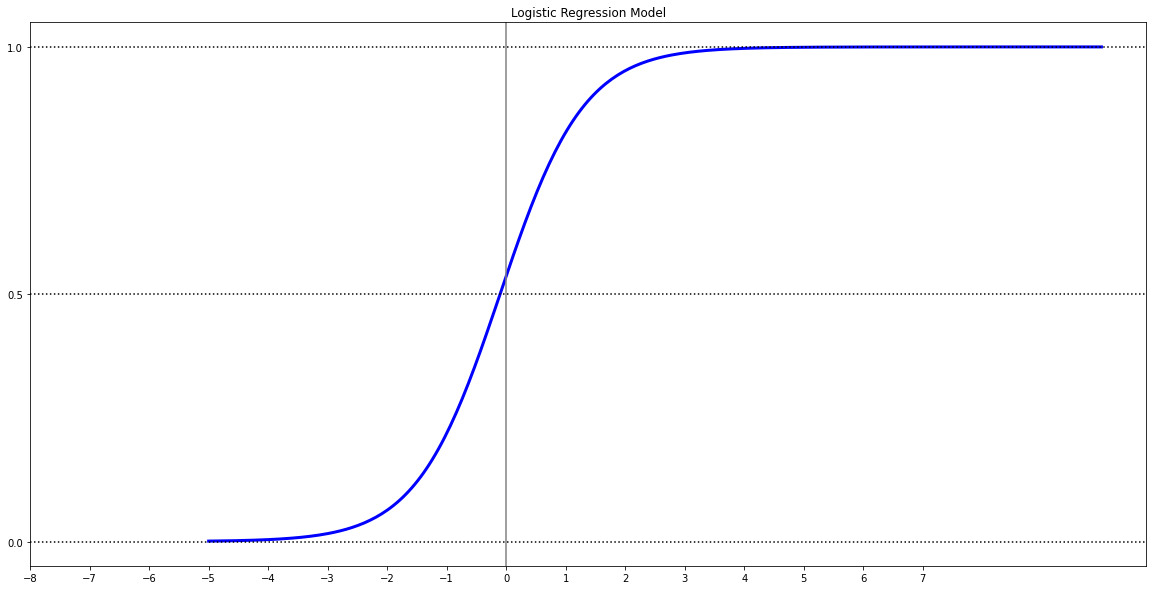

In [1]:
#i just wanted to put a fancy graph instead of inserting the image plus the code isnt from my head so i was like why not \(*.*)/
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# Generating a random classification dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -10, 10
n_samples = 200
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 1] *= 5
X += 1 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(20, 10))
plt.clf()
X_test = np.linspace(-5, 10, 300)
loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='blue', linewidth=3)
plt.axvline(0, color='.5')
plt.axhline(y=0, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.axhline(y=1.0, color="black", linestyle=":")
plt.yticks([0, 0.5, 1])
plt.xticks(range(-8, 8))
plt.title(('Logistic Regression Model'))
plt.show()

For a binary classification task with classes A and B, if a threshold is set for 0.5 and the probability of an instance belonging to a class is p, we can say that
if p < 0.5 the instance if of class A while it is of class B is p > 0.5.
Also known as the log of odds, logit is the logarithm of odds ratio where the odds ratio is the probability that an event occurs divided by the probability that
the event does not occur. Logit is the inverse of the sigmoid such that it maps values from negative infinity to positive infinity



\begin{array}{rrrl}
logit(p) & = & log(\frac{\displaystyle 1p}{\displaystyle 1 - p}) \\
\end{array}

Recall that in linear regression, we minimized the sum of squared errors SSE; in logistic regression, the log-likelihood is maximized.

## Logistic regression problem using the Data set

In [2]:
import pandas as pd
df = pd.read_csv('NFA 2019 public_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


In [4]:
#check distribution of target variable
df['QScore'].value_counts()

3A    51481
2A    10576
2B    10096
1B       16
1A       16
Name: QScore, dtype: int64

In [5]:
df.isna().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [6]:
#for simplicity, we will drop the rows with missing values.
df = df.dropna()

In [7]:
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

An obvious change in our target variable after removing the missing values is that there
are only three classes left and from the distribution of the 3 classes, we can see that
there is an obvious imbalance between the classes. There are methods that can be applied to
handle this imbalance such as oversampling and undersampling.

Oversampling involves increasing the number of instances in the class with fewer instances
while undersampling #involves reducing the data points in the class with more instances.
For now, we will convert this to a binary classification problem by combining class '2A'
and '1A'.

In [8]:
df['QScore'] = df['QScore'].replace(['1A'], '2A')

In [9]:
df.QScore.value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [10]:
df_2A = df[df.QScore=='2A']

In [11]:
df_3A = df[df.QScore=='3A'].sample(350)

In [12]:
data_df = df_2A.append(df_3A) # the end goal herewas to reduce our possible outcomes to 
#two in order to continue with a binary classificaton

In [13]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop=True)
data_df.shape
data_df.QScore.value_counts()

3A    350
2A    240
Name: QScore, dtype: int64

In [14]:
#more preprocessing
data_df = data_df.drop(columns=['country_code', 'country', 'year'])
X = data_df.drop(columns='QScore')
y = data_df['QScore']

In [15]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train.value_counts() 

3A    242
2A    171
Name: QScore, dtype: int64

##WARNING
This area is a bit unclear, personally i would have chosen to encode as datasframe or to use indexing to use numpy indexing to specify columns to avoid the settingcopywarning, but i wanted to be as close as possible to notes, or maybe i would not have ,

Also i had to convert the smote results to a dataframe becausea a lot of preprocessing that i felt could have been done earlier were moved till asfter the balancing and the testsplit...

Any ideas on this issue will be very appreciated

but all in all this really helped me because i like using one hot encoding and i have never really encountered imbalanced datasets before, so i am  really grateful

In [16]:
#There is still an imbalance in the class distribution. For this, we use SMOTE only on the training data to handle this.
#encode categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train.record = encoder.fit_transform(x_train.record)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
x_test.record = encoder.transform(x_test.record)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
x_train_balanced,y_balanced = smote.fit_sample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
x_train_balanced = pd.DataFrame(x_train_balanced, columns=x_train.columns)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=['record']))
normalised_train_df = pd.DataFrame(normalised_train_df,columns=x_train_balanced.drop(columns=['record']).columns)
normalised_train_df['record'] = x_train_balanced['record']
x_test = x_test.reset_index(drop=True)
normalised_test_df = scaler.transform(x_test.drop(columns=['record']))
normalised_test_df = pd.DataFrame(normalised_test_df,
columns=x_test.drop(columns=['record']).columns)
normalised_test_df['record'] = x_test['record']

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_balanced)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Warning 
in this model the random state is set to **None** meaning the model will produce completely different results everytime you run it

This why none of us are getthing the same results as the note, thats why i didnt bother specifying randomsate for most of my models below

### Further reading recommendations
Logistic Regression in Python – Real Python
https://realpython.com/logistic-regression-python/

Building A Logistic Regression in Python, Step by Step
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8



# Lesson 2 Mutliclass Clasification

# Multilabel	and	Multiclass	classification
Multiclass classification deals with more than two classes where an instance is classified into a single class. For example, given a dataset with a set of
features that describe the weather such that the classes are sunny, rainy and windy, a multiclass classification task will only give a single class as the result.
In contrast, multilabel classification classifies an instance into a set of target labels. Articles and movies are examples where this can apply. An article can
discuss a single topic but can also be about politics, religion, education and many more while movies are commonly tagged to multiple genres such as
comedy, adventure, action.
# The	Sigmoid	and	the	Softmax	function
The softmax function is quite similar to the sigmoid explained earlier. It is used for multiclass classification because it can obtain the probabilities for
various classes such that the probabilities of each class sum to 1. This means that an increase in the probability of a class causes a decrease in the probability
of at least one of the other classes. It can also be referred to as a generalization of logistic regression or the sigmoid function and can be used for multi-class
classification while the sigmoid function is used in multi-label classification. The softmax function is popularly used in the output layers of neural networks.
Although the sum of the outputs of the softmax must be 1, this is not the same for the sigmoid function.

\begin{array}{rrrl}
soft max(Z_j) = &\frac{\displaystyle e^{z_j}}{\displaystyle \sum\limits_{k}e^{z_k}}  
\end{array}   
\begin{array}{rrrl}for j =1,........,k\end{array}

#why did not use the dataset given to represent multiclass clasification

*There were at most three possible that could be taking seriously (3a 2a and 2b) decision to drop all the miising values removed the third major outcome, i might go back and do an end to end multiclass clasification project with either this or the quiz data set, so i chose to generate a dummy dataset

and just create a prediction usingthe adaption of logistic regression for multiclass

In [23]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X)

## further reading suggestions
How to Use One-vs-Rest and One-vs-One for Multi-Class Classification
https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/


Multi-Class Text Classification with Scikit-Learn
https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

# lesson 3- Measuring	Classification	Performance

## Warning- 
 This entire section is measuring the accuracy of the  the binary logistic classification model in lesson one with the exception of Kfold Cv and the other CV methods, so its **Very** importnt that all performance metrics are placed before the kfold or if you not what to change the order make sure you change the name of your ytest for the cv because python uses the last definition of a parameter and discards the old one, this is why a well order jupyter notebook or **Unique** names for each parameter is important

## Cross-validation	and	accuracy
From the previous module, we now understand why data scientists and machine learning engineers avoid having models that overfit or underfit. CrossValidation (CV) is a well known and trusted method applied to avoid overfitting and enable generalization. Although there are different techniques used inperforming cross validation, the fundamental concept involves partitioning the dataset into a number of subsets, holding out a set for evaluation then
training the model on the other sets. This gives a more reliable estimate of how the model performs across different training sets because it provides an average score across different training samples used. The only drawback with cross validation is that it takes more time and computational resources however, the gain obtained in having a better model is very well worth this cost. K-Fold cross validation, Stratified K-Fold cross validation and Leave One Out Cross Validation (LOOCV) are some cross validation techniques.

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv=5, scoring='f1_macro')
scores

array([0.52310718, 0.43311688, 0.4733312 , 0.50383632, 0.48952794])

## Confusion Matrix
It is an N	x	N matrix that gives a summary of the correct and incorrect predicted classification results for the N	target classes. The values in the diagonal of
the matrix represent the number of correctly predicted classes while every other cell in the matrix indicates the misclassified classes. This means that the
more predicted values that fall in the diagonal, the better the model. True positive, false positive, true negative and false negative are terms used when
interpreting a confusion matrix.

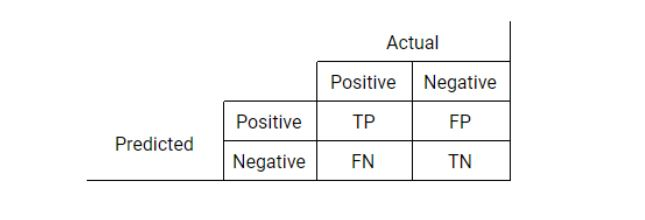

In [25]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
new_predictions = log_reg.predict(normalised_test_df)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions,labels=['2A','3A'])

In [26]:
cnf_mat

array([[44, 25],
       [76, 32]])

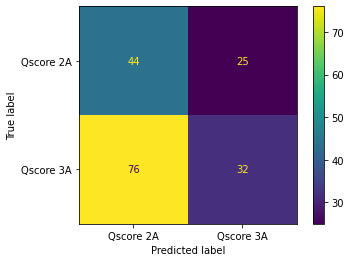

In [27]:
plot_confusion_matrix(log_reg.fit(normalised_train_df, y_balanced),normalised_test_df, y_test, display_labels=["Qscore 2A", "Qscore 3A"])

## Accuracy
This is the ratio of the number of correctly predicted instances to the total number of instances. It is a commonly used metric suitable when the target
classes are not imbalanced. A high accuracy does not necessarily mean that the model has high predicting power. Hence, depending on the task, it is
important to not use only the accuracy metric because it does not provide enough information about the model.

\begin{array}{rrrl}
Accuracy = & \frac{\displaystyle TP + TN }{\displaystyle TP+ TN + FP + FN} 
\end{array}



In [28]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 43.0


**True Positive (TP)**: This is a correct classification where the predicted value is the same as the actual value. Using the table above, this means that actual value was positive and the predicted value was also positive.

**True Negative (TN)**: The predicted value also matches the actual value. In this case, it is for the negative class. The actual value is negative and the predicted value is negative.

**False Positive (FP)**: Also called a Type I error, this is a misclassification such that the model predicted a positive class while the actual class is negative.Telling a man that he is pregnant is definitely a false positive.

**False Negative (FN)**: Also another misclassification where the predicted value is negative and the actual value is positive. Another example will be telling a pregnant woman that she is not pregnant. FN is known as a Type II error.

## Precision
The ratio of correctly predicted instances of a class to the total number of items predicted by the model to be in that class is referred to as precision (known
as Positive Predicted Value - PPV). This translates to the total percentage of the results obtained that are relevant. For the positive class, it is the ratio of true
positives to the sum of true positives and false positives



\begin{array}{rrrl}
Precision = & \frac{\displaystyle TP}{\displaystyle TP+ FP} 
\end{array}

<br/>

The pos_label parameter lets you specify which class should be considered "positive" for the sake of this computation.

In [29]:
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Precision: {}'.format(round(precision*100), 2)) #prints 41.0#note randomstate=NONe thus the value will not be constant
#it will not align with the note but it will be close

Precision: 37.0


## Recall
Known as the sensitivity of the model, recall gives a percentage of total relevant results correctly predicted by the model. It is the ratio of the true positives
to the actual number of positives (true positives and false negatives).
Like in the previous module where we discussed the bias-variance trade-off, there is also a trade-off between precision and recall. It is impossible to
maximise both metrics simultaneously because an increase in recall decreases precision. Identify which metric is important based on your task and optimise.

\begin{array}{rrrl}
Recall = & \frac{\displaystyle TP}{\displaystyle TP + FN} 
\end{array}


In [30]:
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Recall: {}'.format(round(recall*100), 2)) #prints 51.0

Recall: 64.0


## F1-Score
This metric is the harmonic mean of precision and recall that aims to have an optimal balance of both. The F1-Score is quite easy to use and can be focused on to maximize as opposed to maximizing precision and recall.

\begin{array}{rrrl}
F1 = 2 * &\frac{\displaystyle Precision * Recall }{\displaystyle Precision + Recall} 
\end{array}


In [31]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

F1: 47.0


## ROC Curve
The Receiver Operating Characteristics (ROC) curve is a probability curve that measures the performance of a classification model at different set
thresholds. Recall also known as the True Positive Rate (TPR) is plotted on the y-axis against the False Positive Rate (FPR) on the x-axis.
The code examples above are not the optimal results that can be obtained with the model. Hyperparameter tuning can be performed to improve the model

Logistic: ROC AUC=0.473


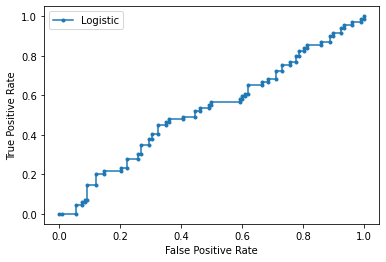

In [32]:
# roc curve and auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot#since we have alresdy fited our model
# predict probabilities
lr_probs = log_reg.predict_proba(normalised_test_df)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs,pos_label='2A')
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

in general the data set is too small and the model too simple this a pretty bad classifier

## further reading recommendation
How to Use ROC Curves and Precision-Recall Curves for Classification in Python
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

Performance Metrics for Classification problems in Machine Learning
https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b#:~:text=We%20can%20use%20classification%20performance,primarily%20used%20by%20search%20engines.

## K-Fold Cross Validation
This technique is called K-Fold because the data is split into K equal groups. If k	= 5, a 5-fold cross validation can be performed such that the data is split into k1, k2, k3, k4 and k5. The model is trained on k2 - k5 and evaluated on k1 then repeated k times until every group is used to train and test the model.

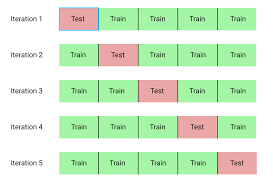

In [33]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.split(normalised_train_df)
f1_scores = []
#run for every split
for train_index, test_index in kf.split(normalised_train_df):
   x_train, x_test = normalised_train_df.iloc[train_index],normalised_train_df.iloc[test_index]
   y_train, y_testk = y_balanced[train_index],y_balanced[test_index]
model = LogisticRegression().fit(x_train, y_train)
#save result to list
f1_scores.append(f1_score(y_true=y_testk, y_pred=model.predict(x_test),pos_label='2A')**100)


In [34]:
f1_scores

[0.0]

## Stratified K-Fold Cross Validation
Although similar to the technique described above, Stratified K-Fold cross validation ensures that in every fold, there is an equal proportion of each target class to obtain a good representation of the data and avoid imbalance and biased results. For example, if there are two target classes t and t with equal distribution in the data, it is best to ensure that the folds also have the same distribution.

In [35]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
f1_scores = []
#run for every split
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
    x_train, x_test = np.array(normalised_train_df)[train_index],np.array(normalised_train_df)[test_index]
    y_train, y_testsk = y_balanced[train_index], y_balanced[test_index]
model = LogisticRegression().fit(x_train, y_train)
#save result to list
f1_scores.append(f1_score(y_true=y_testsk, y_pred=model.predict(x_test), pos_label='2A'))

In [36]:
f1_scores

[0.5523809523809524]

## Leave One Out Cross Validation (LOOCV)
In this method, one instance is left out and used as the test set while the model is trained on N-1 data points where N is the number of data points. This
means that the number of instances and folds are equal.

Accuracy, precision, recall, F1-score and many others are evaluation metrics used in measuring the performance of classification models. In this section, we discuss these metrics.

In [37]:
accuracy = accuracy_score(y_true=y_testk, y_pred= model.predict(x_test) )
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 59.0


In [38]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_balanced, cv=loo,
scoring='f1_macro')
average_score = scores.mean() * 100

In [39]:
average_score

45.66115702479338

Gentle introduction to cross validation:

https://machinelearningmastery.com/k-fold-cross-validation/

# Tree-Based	Methods	and	The	Support	Vector	Machine
 ## Linear	and	non-linear	Support	Vector	Machine
Support Vector Machine (SVM) is a supervised machine learning algorithm that is used to solve both classification and regression tasks. In classification, the
algorithm uses a line or hyperplane to separate classes by using data points close to the boundary (support vector) for each class and a hyperplane that
maximizes the distance between the classes. For clarity, a hyperplane is a line that linearly separates data points. Although there can be several hyperplanes
between classes, the optimal hyperplane which has the maximum distance or margin between itself and the support vectors is chosen.

As we know, data is not always linearly separable such that a straight line might not be able to adequately segregate classes. Although SVM is a linear
classifier, it can be used to classify a non-linear dataset by transforming the dataset to a higher dimensional feature space where it can be linearly separable.
This is done using the kernel trick such that a kernel function is applied on each data point to map to a higher dimensional space.

## warning
compare all these new models and esemble methods with the barebones logistic regression used in lesson

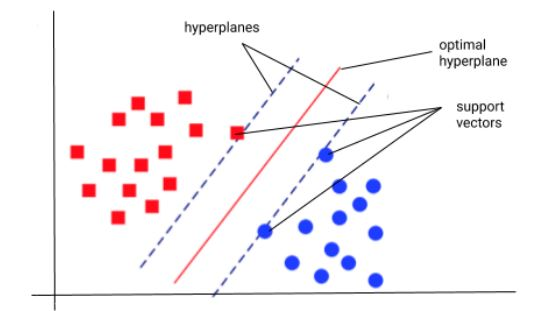


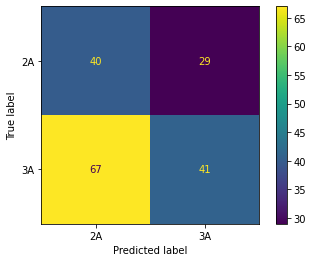

In [40]:
from sklearn import svm
clfsv = svm.SVC(kernel='linear')
clfsv.fit(normalised_train_df, y_balanced)
plot_confusion_matrix(clfsv, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["2A", "3A"])

https://machinelearningmastery.com/support-vector-machines-for-machine-learning/

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

# Decision	Trees	and	CART	algorithm	
The decision tree is a widely used non-parametric supervised machine learning approach that splits instances in a dataset based on different decision rules
inferred from the features in the dataset. It is a tree-based algorithm with nodes that represent a specific attribute or decision rule such that for an instance,
a question is asked at a node and possible answers to the question found on both edges. This is a sequential process that involves recursive partitioning of
nodes for several features until the leaves for the tree provides the final output or class for that instance. Decision trees can also be used to solve regression
problems.

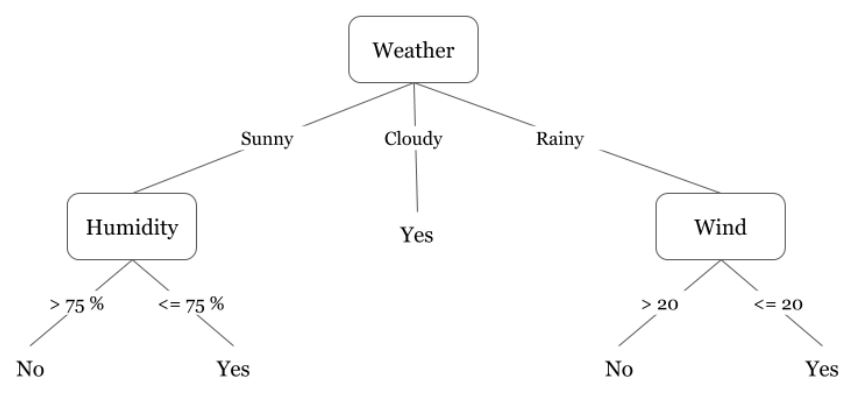


ID3 - Iterative Dichotomiser 3, CART - Classification and Regression Trees, and C4.5 are some examples of decision tree algorithms. In this section, we only
discuss the CART algorithm. The CART predictive model generates decision rules that have a binary tree representation such that each non-terminal node
has two child nodes as opposed to some other tree-based methods that have more child nodes. It supports numerical target variables. At every node, the
best split is chosen such that the splitting criterion is maximised. Gini impurity index is used as the splitting criterion in CART.
Gini Impurity: this is a measure of the chance that a randomly selected instance will be wrongly classified when selected. For different classes in a dataset,
with p(i) as the probability that the chosen instance belongs to class i, the gini impurity index for all classes G, can be calculated such that:






\begin{array}{rrrl}
G = 1- \sum\limits_{i} p(i) ^2 
\end{array}

In [41]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(normalised_train_df, y_balanced)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

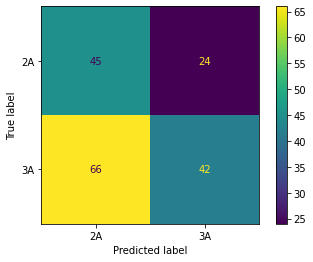

In [42]:
plot_confusion_matrix(dec_tree, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["2A", "3A"])

[Text(596.8856249999999, 394.11, 'fishing_ground <= 0.012\ngini = 0.5\nsamples = 484\nvalue = [242, 242]\nclass = 2A'),
 Text(406.99125, 366.93, 'fishing_ground <= 0.0\ngini = 0.498\nsamples = 452\nvalue = [239, 213]\nclass = 2A'),
 Text(251.09999999999997, 339.75, 'built_up_land <= 0.003\ngini = 0.5\nsamples = 321\nvalue = [157, 164]\nclass = 3A'),
 Text(184.14, 312.57, 'crop_land <= 0.0\ngini = 0.499\nsamples = 309\nvalue = [147, 162]\nclass = 3A'),
 Text(117.17999999999999, 285.39, 'total <= 0.0\ngini = 0.5\nsamples = 274\nvalue = [139, 135]\nclass = 2A'),
 Text(83.69999999999999, 258.21, 'fishing_ground <= 0.0\ngini = 0.5\nsamples = 261\nvalue = [127, 134]\nclass = 3A'),
 Text(66.96, 231.03, 'forest_land <= 0.0\ngini = 0.5\nsamples = 249\nvalue = [127, 122]\nclass = 2A'),
 Text(50.22, 203.85, 'built_up_land <= 0.0\ngini = 0.499\nsamples = 246\nvalue = [127, 119]\nclass = 2A'),
 Text(33.48, 176.67, 'record <= 0.216\ngini = 0.5\nsamples = 242\nvalue = [123, 119]\nclass = 2A'),
 Text(

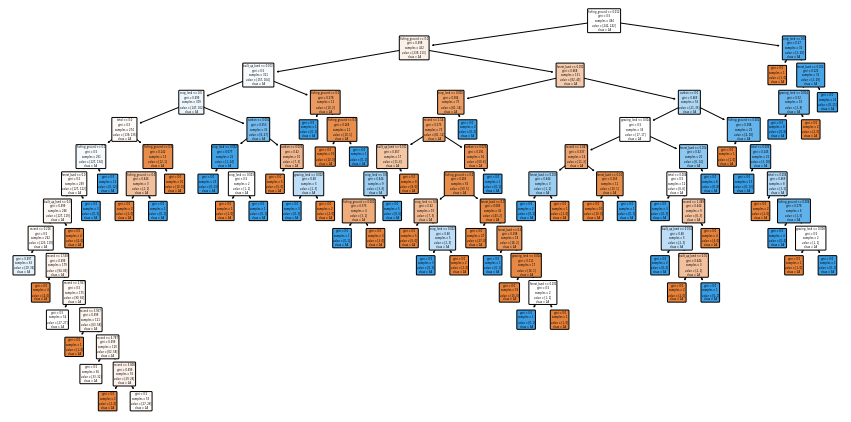

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(dec_tree, 
          filled=True, 
          rounded=True, 
          class_names=["2A", "3A"], 
          feature_names=normalised_train_df.columns) 

Gini impurity index values range between 0 and 1 such that 0 translates to a pure classification where all instances belong to the same class while 1 means
that there is a random distribution of the instances across different classes. To select the best split, the gini gain is calculated by taking a weighted sum of the
gini impurity index then subtracting from the original impurity. Higher gini gain leads to better splits simply put, the lower the gini impurity, the better the
split.
## Overfitting	in	Decision	Trees,	Early	Stopping	and	Pruning
The recursive partitioning of nodes until the final subsets are obtained in decision trees makes it prone to overfitting. The deeper the tree, the higher the
chances of the overfitting. This can be prevented using a stopping criterion such as early stopping and pruning. Early stopping or pre-pruning involves
stopping the tree-building process before the tree becomes too complex and the training data is perfectly classified. An early stopping condition like the
maximum depth can be set to avoid deep trees such that the tree stops growing after reaching the set maximum depth for the tree. Another early stopping
criterion that can be used is the classification error. At every splitting stage, the error is checked. If there is no significant decrease in the error, there is no
need to make the tree more complex. When there are fewer data points than a set threshold value, early stopping can also take place. Early stopping may
also produce underfit models if it stops too early. Post-pruning, on the other hand, allows the tree to be fully built before simplifying by removing sections
of the tree at different levels by calculating the error rate.

# Early stoppping by limiting depth

i basically just chopped the life out of this tree, its clearly underfitted so in real world scenarios the praaemeter tuning should be done with careful consideration

https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


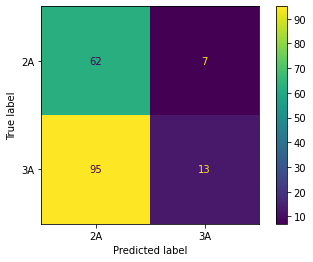

In [44]:
edec_tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
edec_tree.fit(normalised_train_df, y_balanced)
plot_confusion_matrix(edec_tree, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["2A", "3A"])

[Text(562.359375, 373.72499999999997, 'crop_land <= 0.02\ngini = 0.5\nsamples = 484\nvalue = [242, 242]\nclass = 2A'),
 Text(392.34375, 305.775, 'total <= 0.007\ngini = 0.5\nsamples = 469\nvalue = [240, 229]\nclass = 2A'),
 Text(209.25, 237.825, 'total <= 0.006\ngini = 0.499\nsamples = 445\nvalue = [234, 211]\nclass = 2A'),
 Text(104.625, 169.87499999999997, 'grazing_land <= 0.012\ngini = 0.498\nsamples = 433\nvalue = [230, 203]\nclass = 2A'),
 Text(52.3125, 101.92499999999995, 'gini = 0.499\nsamples = 420\nvalue = [220, 200]\nclass = 2A'),
 Text(156.9375, 101.92499999999995, 'forest_land <= 0.001\ngini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = 2A'),
 Text(104.625, 33.974999999999966, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = 2A'),
 Text(209.25, 33.974999999999966, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = 2A'),
 Text(313.875, 169.87499999999997, 'built_up_land <= 0.004\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = 3A'),
 Text(261.5625, 101.9249999999999

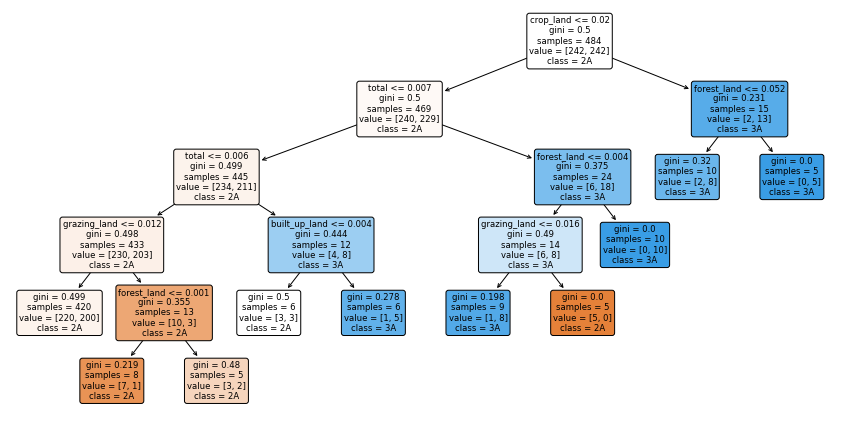

In [45]:
plt.figure(figsize=(15,7.5))
plot_tree(edec_tree, 
          filled=True, 
          rounded=True, 
          class_names=["2A", "3A"], 
          feature_names=normalised_train_df.columns)

## post-pruning using cost complexity
Pruning a decision tree is all about finding the right value for the pruning parameter, alpha, which controls how little or how much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values for alpha.
It requires far more computaional power than early stopping because you have to have completed an initial model and several permuations of your model
 

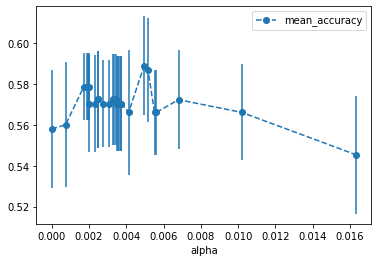

In [46]:
path = dec_tree.cost_complexity_pruning_path(normalised_train_df, y_balanced)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, normalised_train_df, y_balanced, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')


Pick the alpha with the heighest mean accuracy

---



In [47]:
dfal= pd.DataFrame(alpha_results.max())
dfal

,0
alpha,0.016328
mean_accuracy,0.588875
std,0.030476


In [48]:
idealccp = dfal[0].iloc[0]
idealccp

0.016327689094613795

In [49]:
idealccp= float(idealccp)

In [50]:
dec_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=idealccp)
dec_pruned = dec_pruned.fit(normalised_train_df, y_balanced) 

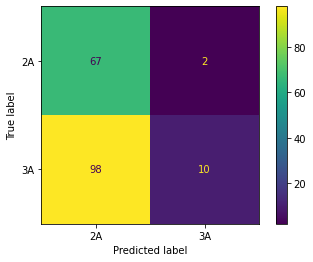

In [51]:
plot_confusion_matrix(dec_pruned, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["2A", "3A"])

[Text(418.5, 305.775, 'fishing_ground <= 0.012\ngini = 0.5\nsamples = 484\nvalue = [242, 242]\nclass = 2A'),
 Text(209.25, 101.92500000000001, 'gini = 0.498\nsamples = 452\nvalue = [239, 213]\nclass = 2A'),
 Text(627.75, 101.92500000000001, 'gini = 0.17\nsamples = 32\nvalue = [3, 29]\nclass = 3A')]

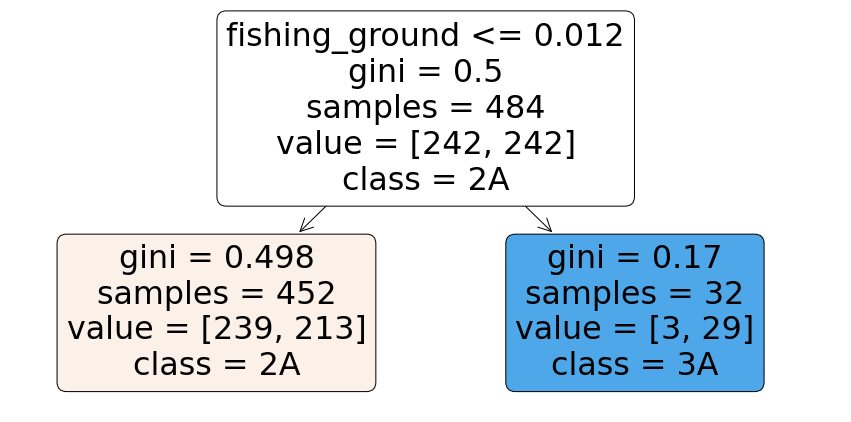

In [52]:
plt.figure(figsize=(15,7.5))
plot_tree(dec_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["2A", "3A"], 
          feature_names=normalised_train_df.columns)

 The variable (column name) and the threshold for splitting the observations. For example, in the tree's root, we use **ca** to split the observations. All
observations with **ca <= 0.5** go to the **left** and all observations with **ca > 0.5** go to the **right**.
- **gini** is the gini index or score for that node
- **samples** tell us how many samples are in that node
- **value** tells us how many samples in the node are in each category. In this example, we have two categories, **2A** and **3A**, referring to the Qscore.
- **class** tells us whichever category is represented most in the node.
The leaves are just like the nodes, except that they do not contain a variable and threshold for splitting the observations.

The nodes and leaves are colored by the **class**. In this case **2A** is different shades of orange-ish and **3a** is different shades of blue. The the darker the shade, the lower the **gini** score, and that tells us how much the node or leaf is skewed towards one class.

## further reading recommendations
Decision Tree Classification:
An introduction to Decision Tree Classifier
https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac

Classification and regression-trees for machine-learning
https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/

MACHINE LEARNING
Machine Learning: Pruning Decision Trees

https://www.displayr.com/machine-learning-pruning-decision-trees/#:~:text=As%20the%20names%20suggest%2C%20pre,tree%20after%20it%20has%20finished.


# Lesson 5 Ensemble	Methods
## Beyond	decision	trees	and	ensemble	classifiers
Ensembling in machine learning involves the combination of several classifiers to obtain an optimal model with better performance as opposed to just a
single classifier. These classifiers can be of different algorithms and hyperparameters. Bagging, boosting, stacking and blending are methods classifiers can
be combined.

### Bagging
Bootstrap Aggregation or Bagging is a parallel ensembling technique that randomly bootstraps or samples the dataset with replacement to create subsets
from the original. Multiple models are then trained using these subsets and the predicted results from these models aggregated to return final predictions.
Bagging results in a final model that has less variance than its base classifiers.
## Bagging: Random Forests
When bagging is applied to decision trees, it results in random forests which is a supervised learning algorithm that has a large number of decision trees. For
an instance in the dataset, each tree returns a prediction for the class the instance belongs to then, the class with the most votes becomes the final class for
that instance. In random forests, it is assumed that a group of uncorrelated trees will do better than an individual tree. While some of the trees might be
wrong in their predictions, many others will be correct.

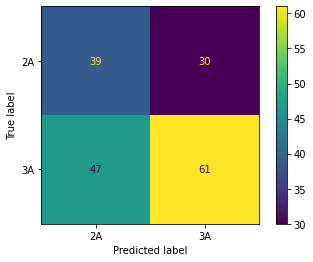

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(normalised_train_df, y_balanced)
plot_confusion_matrix(model, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["2A", "3A"])

https://machinelearningmastery.com/random-forest-ensemble-in-python/


everything you need toknow about decision trees (random forest,bagging,boosting)

https://towardsdatascience.com/everything-you-need-to-know-about-decision-trees-8fcd68ecaa71#:~:text=A%20classification%20tree%20is%20very%20similar%20to%20a%20regression%20tree.&text=Instead%2C%20each%20split%20is%20done,to%20the%20most%20common%20class.



## Boosting: AdaBoost, Gradient Boosting and XGBoost
## Boosting
Boosting is a sequential process where every phase attempts to correct the errors made by the previous model. The main principle is to fit multiple weak
learners which are slightly better than just random guessing. In contrast to bagging, boosting attempts to reduce both variance and bias. AdaBoost, Gradient
Boosting and XGBoost are examples of boosting algorithms.

**AdaBoost**: Adaptive Boosting is the first boosting algorithm. It is a very popular method for boosting that can be used on any classifier to present a more
accurate model and improve its performance. It can be described with the following steps: create a subset from the entire dataset, assign equal weights to
the data points, create a base model using this subset, predict using this model, calculate errors from the predicted results, assign higher weights to
misclassified instances to increase their chances of being selected, create another model that tries to correct these mistakes and make new predictions then
repeat until the maximum number of models specified are created. The final model is the weighted average of all the weak learners created. AdaBoost is
very sensitive to noisy data and outliers so it is important to remove these when using AdaBoost.


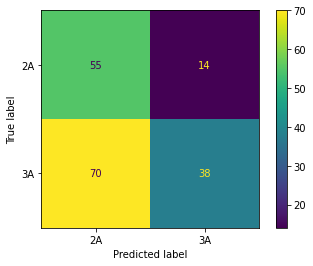

In [54]:
from sklearn.ensemble import AdaBoostClassifier
model1 = AdaBoostClassifier()
# fit the model on the whole dataset
model1.fit(normalised_train_df, y_balanced)
plot_confusion_matrix(model1, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["2A", "3A"])

**Gradient Boosting**: This is another boosting algorithm that improves model performance where each model in the ensemble minimizes a loss function using
gradient descent. The loss function which is used to obtain an estimate of how the model is performing, a weak learner - a model only slightly better than random guessing typically decision stumps (a decision tree with a single split - one level) and an additive model that combines the weak learners to make
the final model are three important components in gradient boosting.


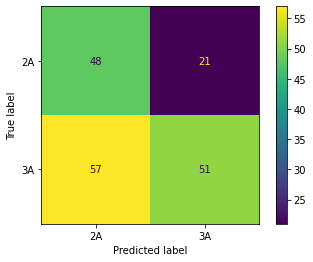

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier()
# fit the model on the whole dataset
model2.fit(normalised_train_df, y_balanced)
plot_confusion_matrix(model2, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["2A", "3A"])

**XGBoost**: Extreme Gradient Boosting is a supervised learning algorithm that implements gradient boosting by building trees parallely while applying
regularization. It is well known for its scalability and fast execution. XGBoost can automatically identify missing values in data and it builds very deep trees
before pruning for optimisation.


it is not in sklearn for now but a library of its own, but it uses a sklearn syntax and relies on sklearn for preprocessing

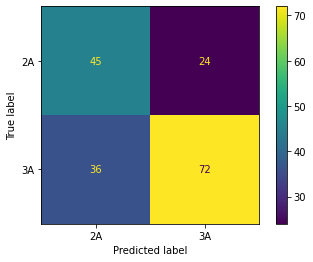

In [56]:
from xgboost import XGBClassifier
model3 = XGBClassifier()
# fit the model on the whole dataset
model3.fit(normalised_train_df, y_balanced)
plot_confusion_matrix(model3, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["2A", "3A"])


https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e

# Conclusion 
if you made this far thanks and also note that the all the models can be hypertuned especially in realworld scenarios 

coming soon - end to end clasification using the quiz dataset
please share your thoughts with me so i can make changes and improve my studying